In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
#import python libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
from sklearn.preprocessing import LabelEncoder

In [3]:
#reading the dataset
dataFrame = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
#we change the datatype to make it accessible
dataFrame['TotalCharges'] = pd.to_numeric(dataFrame['TotalCharges'], errors='coerce')

dataFrame['TotalCharges'] = dataFrame['TotalCharges'].astype(float)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



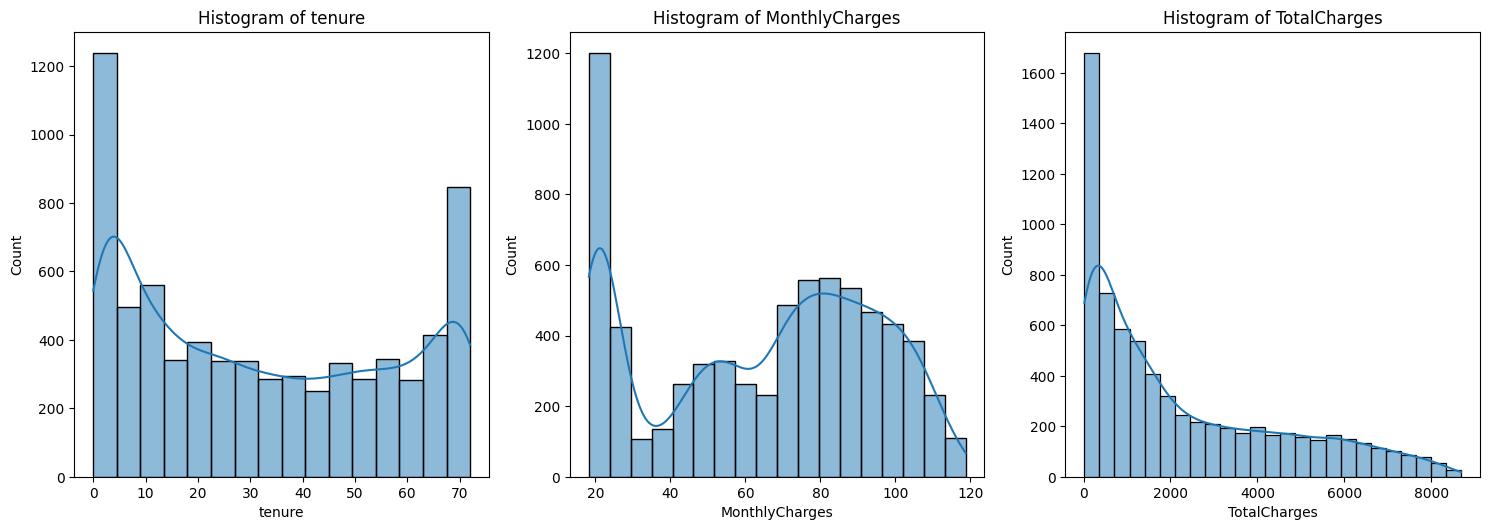

In [5]:
#plot histograms
num_variables = ['tenure','MonthlyCharges','TotalCharges']
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_variables):
    plt.subplot(2, 3, i + 1)  
    sns.histplot(dataFrame[var], kde=True)  
    plt.title(f'Histogram of {var}')  
plt.tight_layout() 
plt.show()

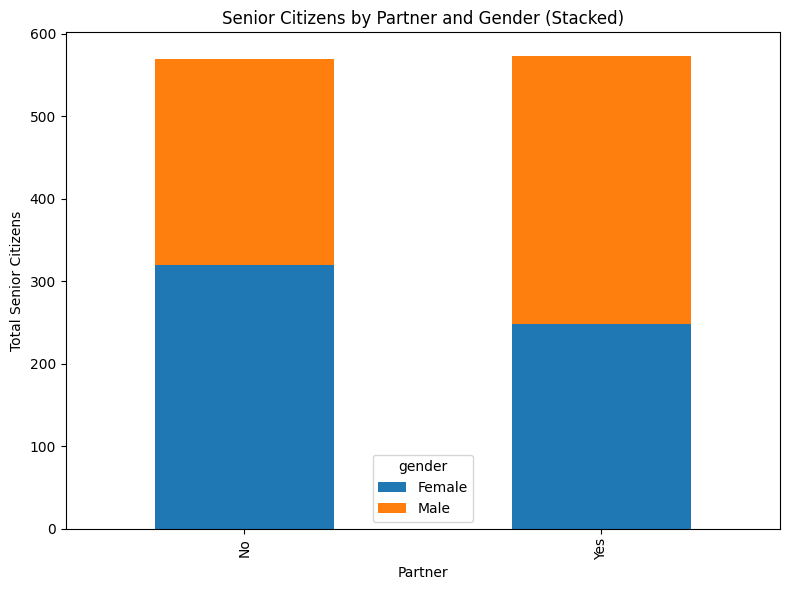

In [6]:
#plot bar graphs
senior_citizen_by_gender = dataFrame.groupby(['Partner', 'gender'])['SeniorCitizen'].sum().unstack()
fig, axes = plt.subplots(figsize=(8, 6))  # Adjust figsize as needed
senior_citizen_by_gender.plot(kind='bar', stacked=True, ax=axes)
axes.set_xlabel('Partner')
axes.set_ylabel('Total Senior Citizens')
axes.set_title('Senior Citizens by Partner and Gender (Stacked)')
plt.tight_layout()
plt.show()

In [7]:
#model scatter plots of PaymentMethod vs TotalCharges
fig = px.scatter(dataFrame, x='PaymentMethod', y='TotalCharges',
                 title='Scatter Plot of PaymentMethod vs TotalCharges',
                 labels={'PaymentMethod': 'PaymentMethod', 'TotalCharges': 'Total Charges'},
                 size='tenure',
                 color = 'tenure',
                 size_max=20,
                 hover_data=['InternetService', 'Contract'])

fig.show()

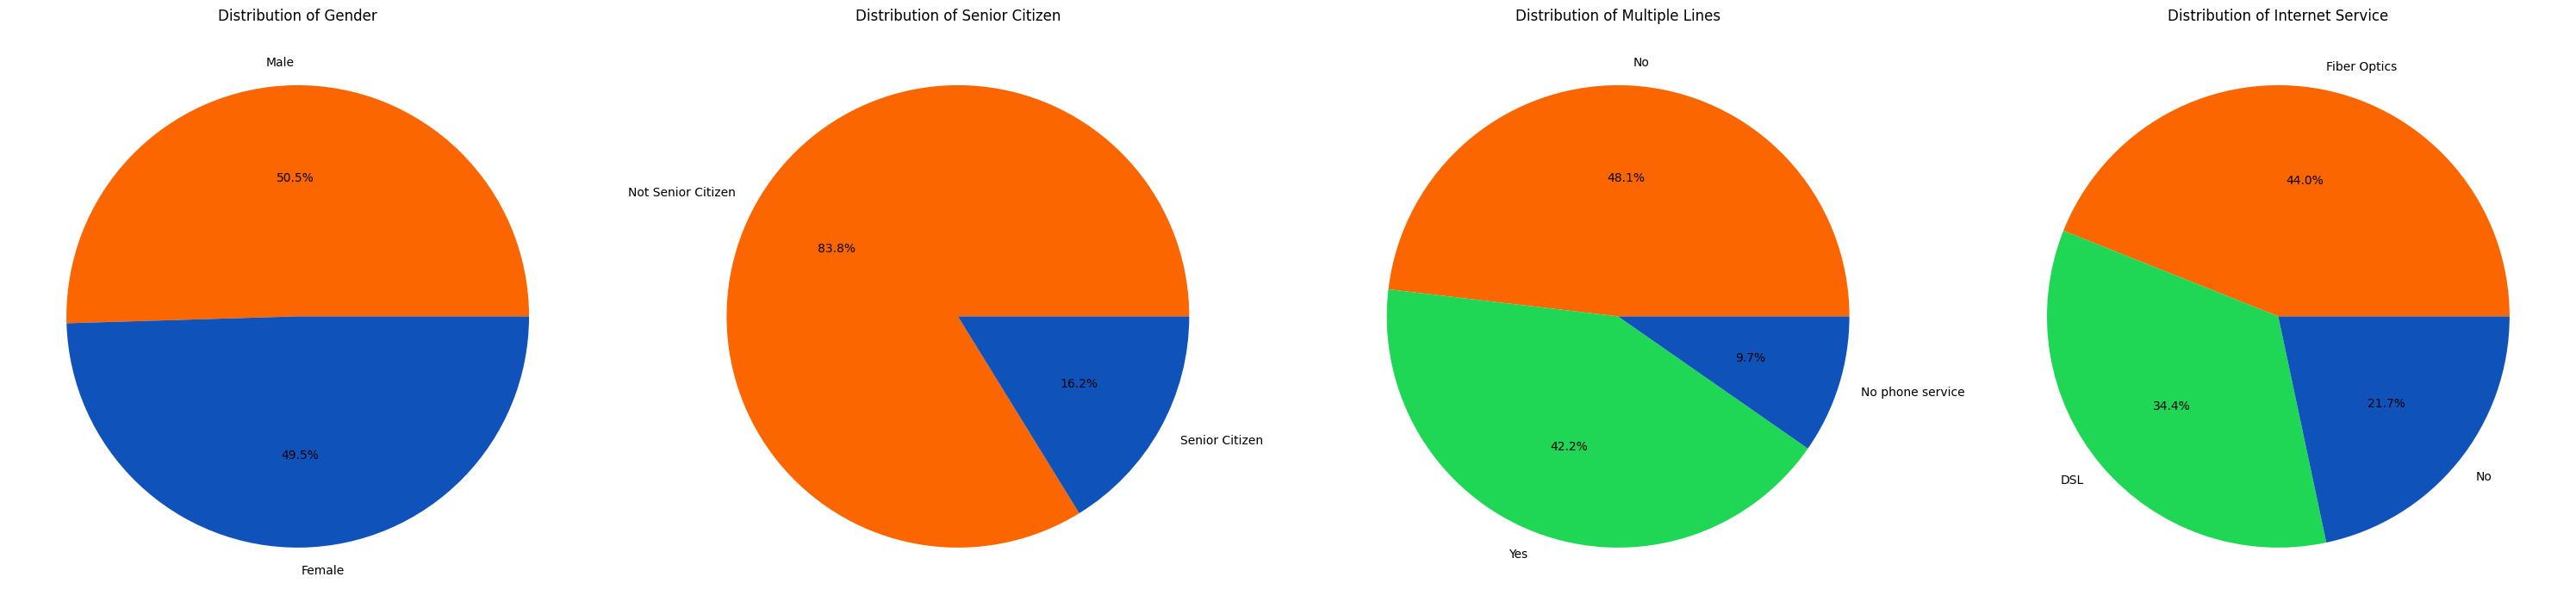

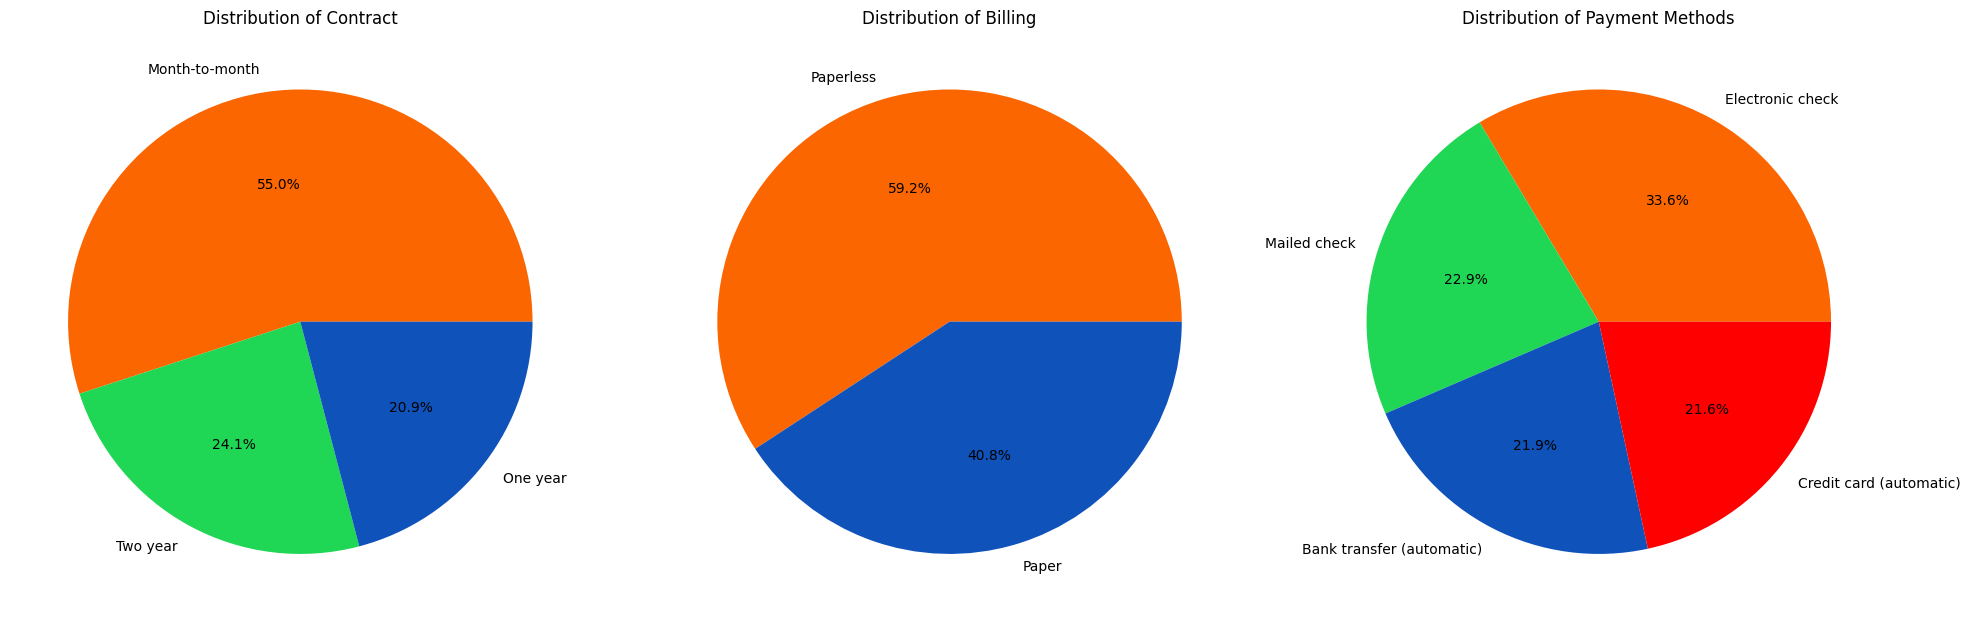

In [8]:
#plot pie charts
fig, axes = plt.subplots(1,4,figsize=(30,30))

# gender of customer 
gender_counts = dataFrame['gender'].value_counts()
axes[0].pie(gender_counts, labels=['Male', 'Female'], 
        autopct='%1.1f%%', colors=['#fc6600', '#0f52ba'])
axes[0].set_title('Distribution of Gender')

# SeniorCitizen of customer 
senior_citizen_counts = dataFrame['SeniorCitizen'].value_counts()
axes[1].pie(senior_citizen_counts, labels=['Not Senior Citizen', 'Senior Citizen'], 
        autopct='%1.1f%%', colors=['#fc6600', '#0f52ba'])
axes[1].set_title('Distribution of Senior Citizen')

# MultipleLines of customer 
multiple_lines_counts = dataFrame['MultipleLines'].value_counts()
axes[2].pie(multiple_lines_counts, labels=['No', 'Yes', 'No phone service'], 
        autopct='%1.1f%%', colors=['#fc6600','#1fd655', '#0f52ba'])
axes[2].set_title('Distribution of Multiple Lines') 

# InternetService of customer 
internet_service_counts = dataFrame['InternetService'].value_counts()
axes[3].pie(internet_service_counts, labels=['Fiber Optics', 'DSL', 'No'], 
        autopct='%1.1f%%', colors=['#fc6600','#1fd655', '#0f52ba'])
axes[3].set_title('Distribution of Internet Service')

plt.tight_layout()
plt.show()
fig, axes = plt.subplots(1,3,figsize=(20,20))
#Contract of customer 
contract_counts = dataFrame['Contract'].value_counts()
axes[0].pie(contract_counts, labels=['Month-to-month', 'Two year', 'One year'], 
        autopct='%1.1f%%', colors=['#fc6600','#1fd655', '#0f52ba'])
axes[0].set_title('Distribution of Contract')


#Paperless billing of customer 
paperless_counts = dataFrame['PaperlessBilling'].value_counts()
axes[1].pie(paperless_counts, labels=['Paperless', 'Paper'], 
        autopct='%1.1f%%', colors=['#fc6600', '#0f52ba'])
axes[1].set_title('Distribution of Billing')


# Payment Method of customer 
payment_counts = dataFrame['PaymentMethod'].value_counts()
axes[2].pie(payment_counts, labels=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'
], autopct='%1.1f%%', colors=['#fc6600','#1fd655', '#0f52ba', '#ff0000'])
axes[2].set_title('Distribution of Payment Methods')

plt.tight_layout()
plt.show()


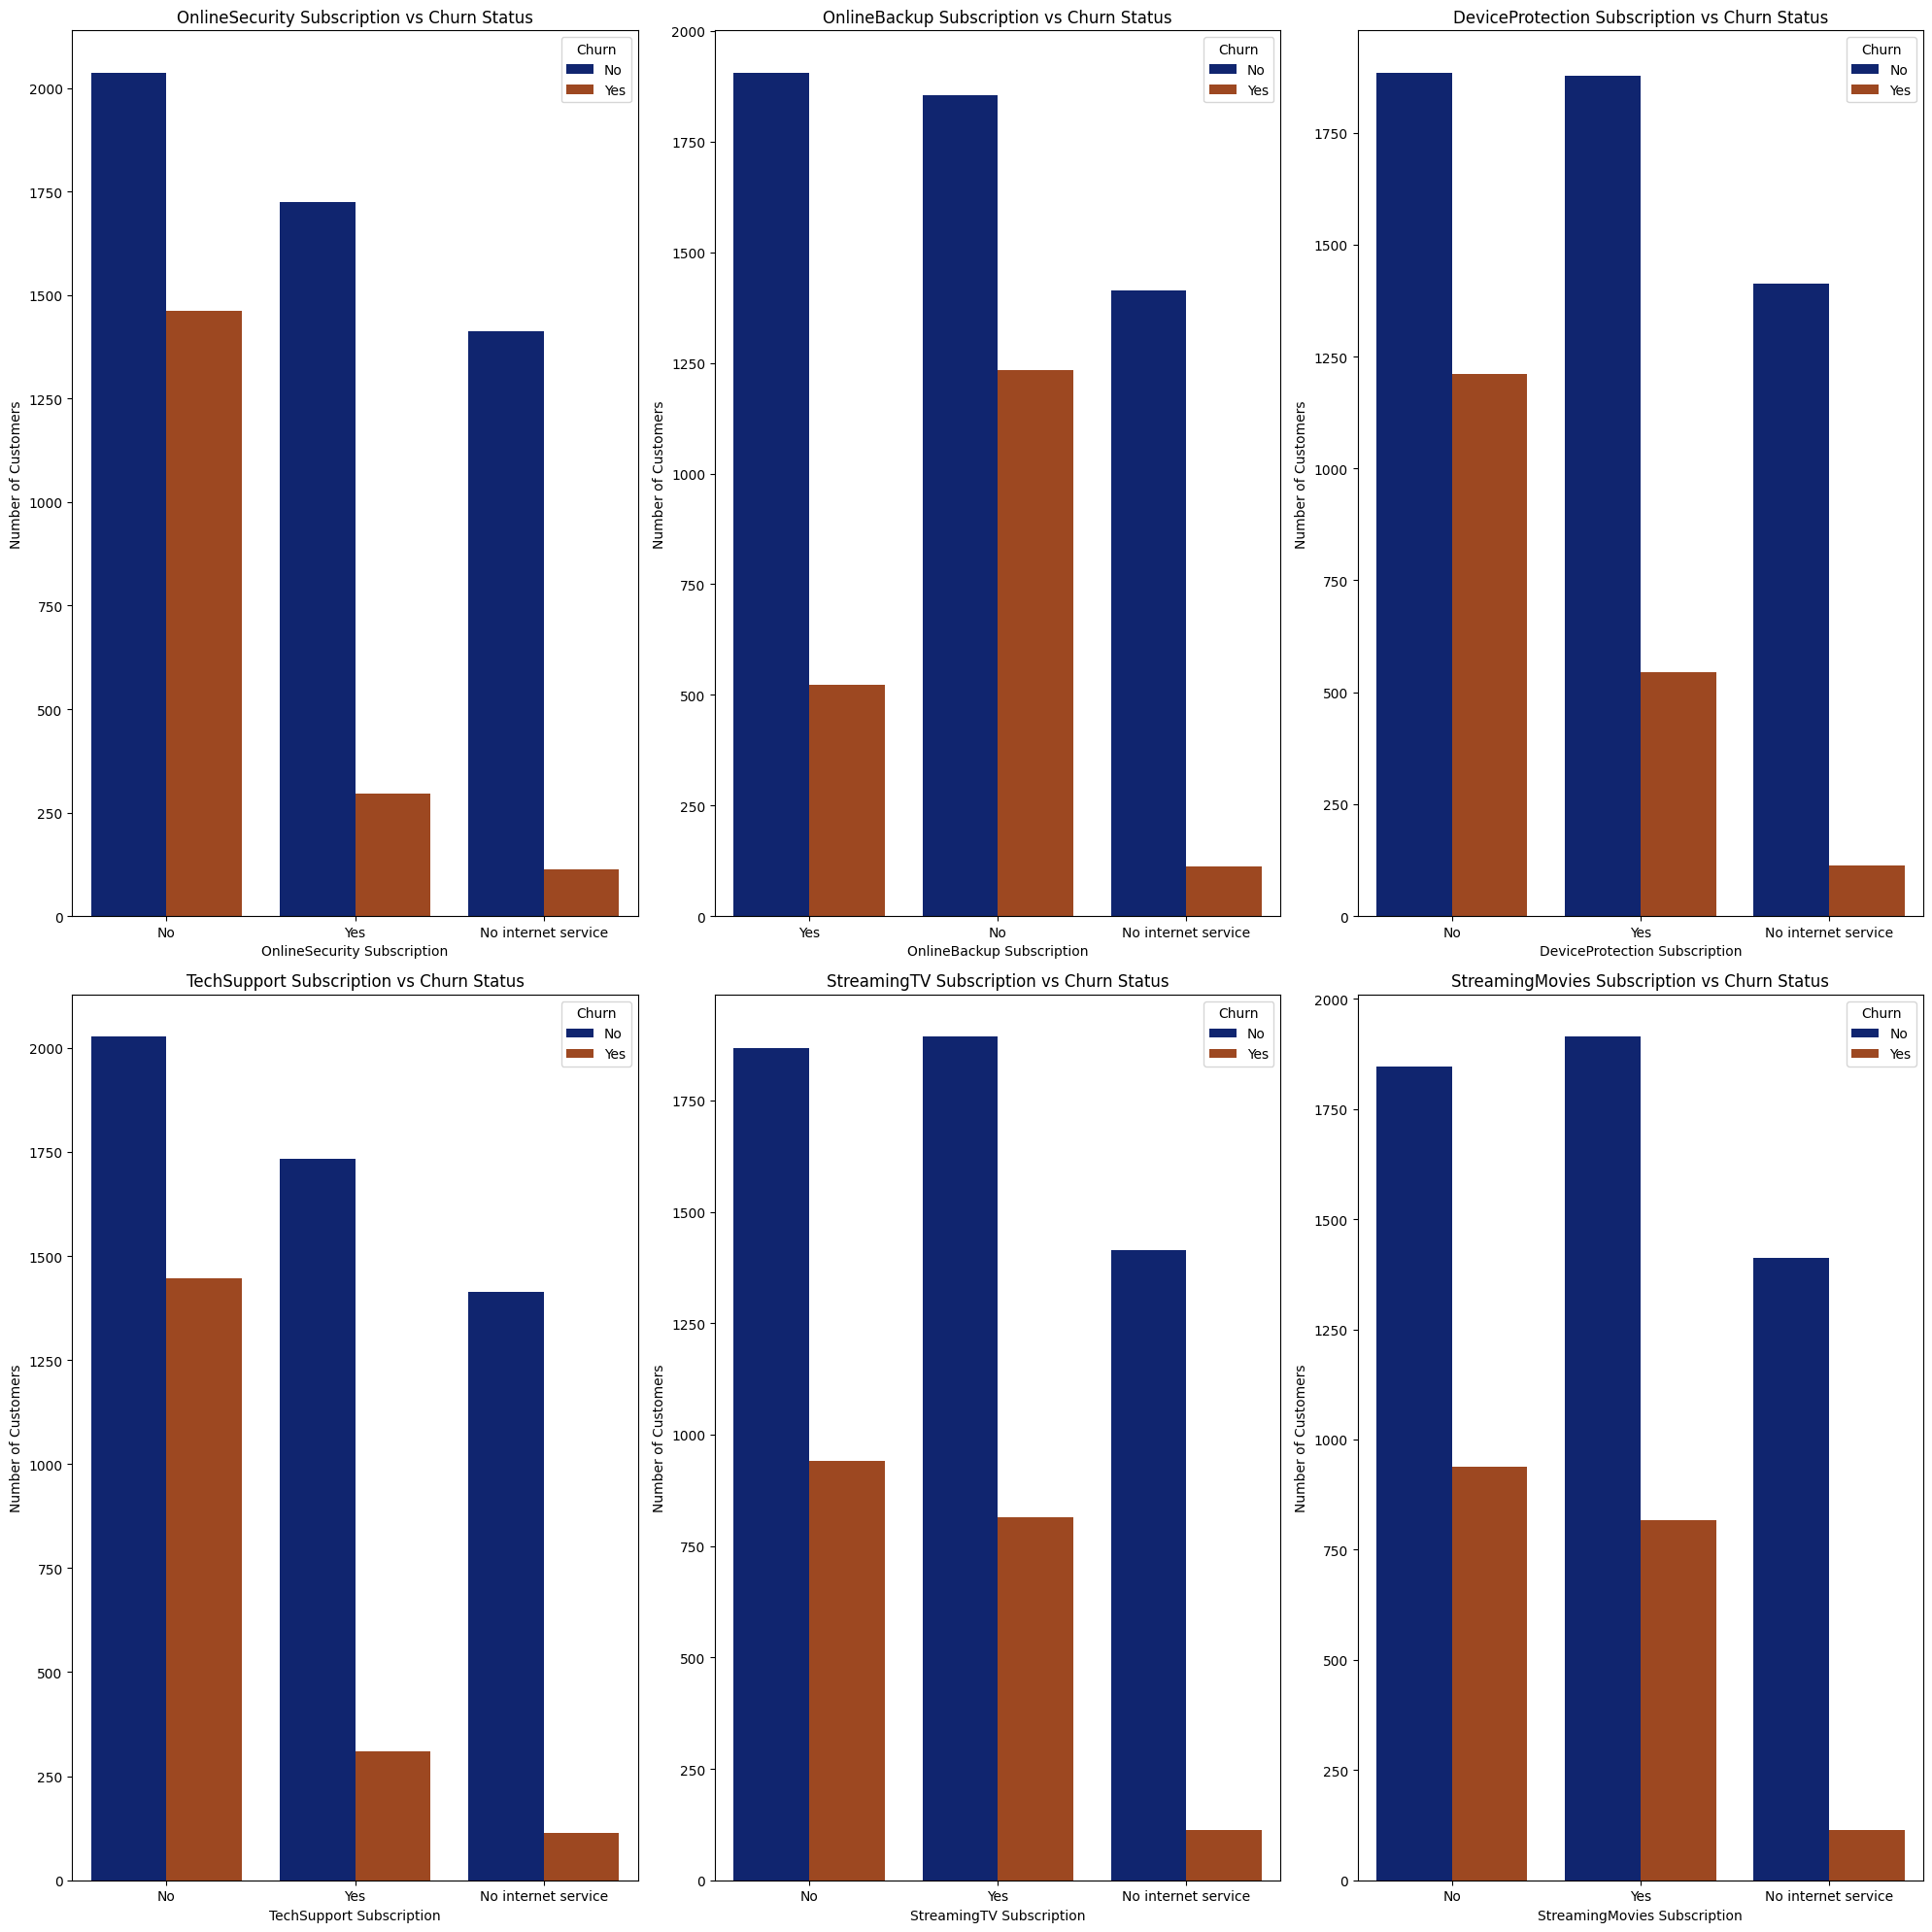

In [9]:
#plotting bar graphs
num_variables = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']
plt.figure(figsize=(20, 20))
for i, var in enumerate(num_variables):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=var, hue='Churn', data=dataFrame, palette='dark');
    plt.title(f'{var} Subscription vs Churn Status');
    plt.ylabel('Number of Customers');
    plt.xlabel(f'{var} Subscription');
    plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

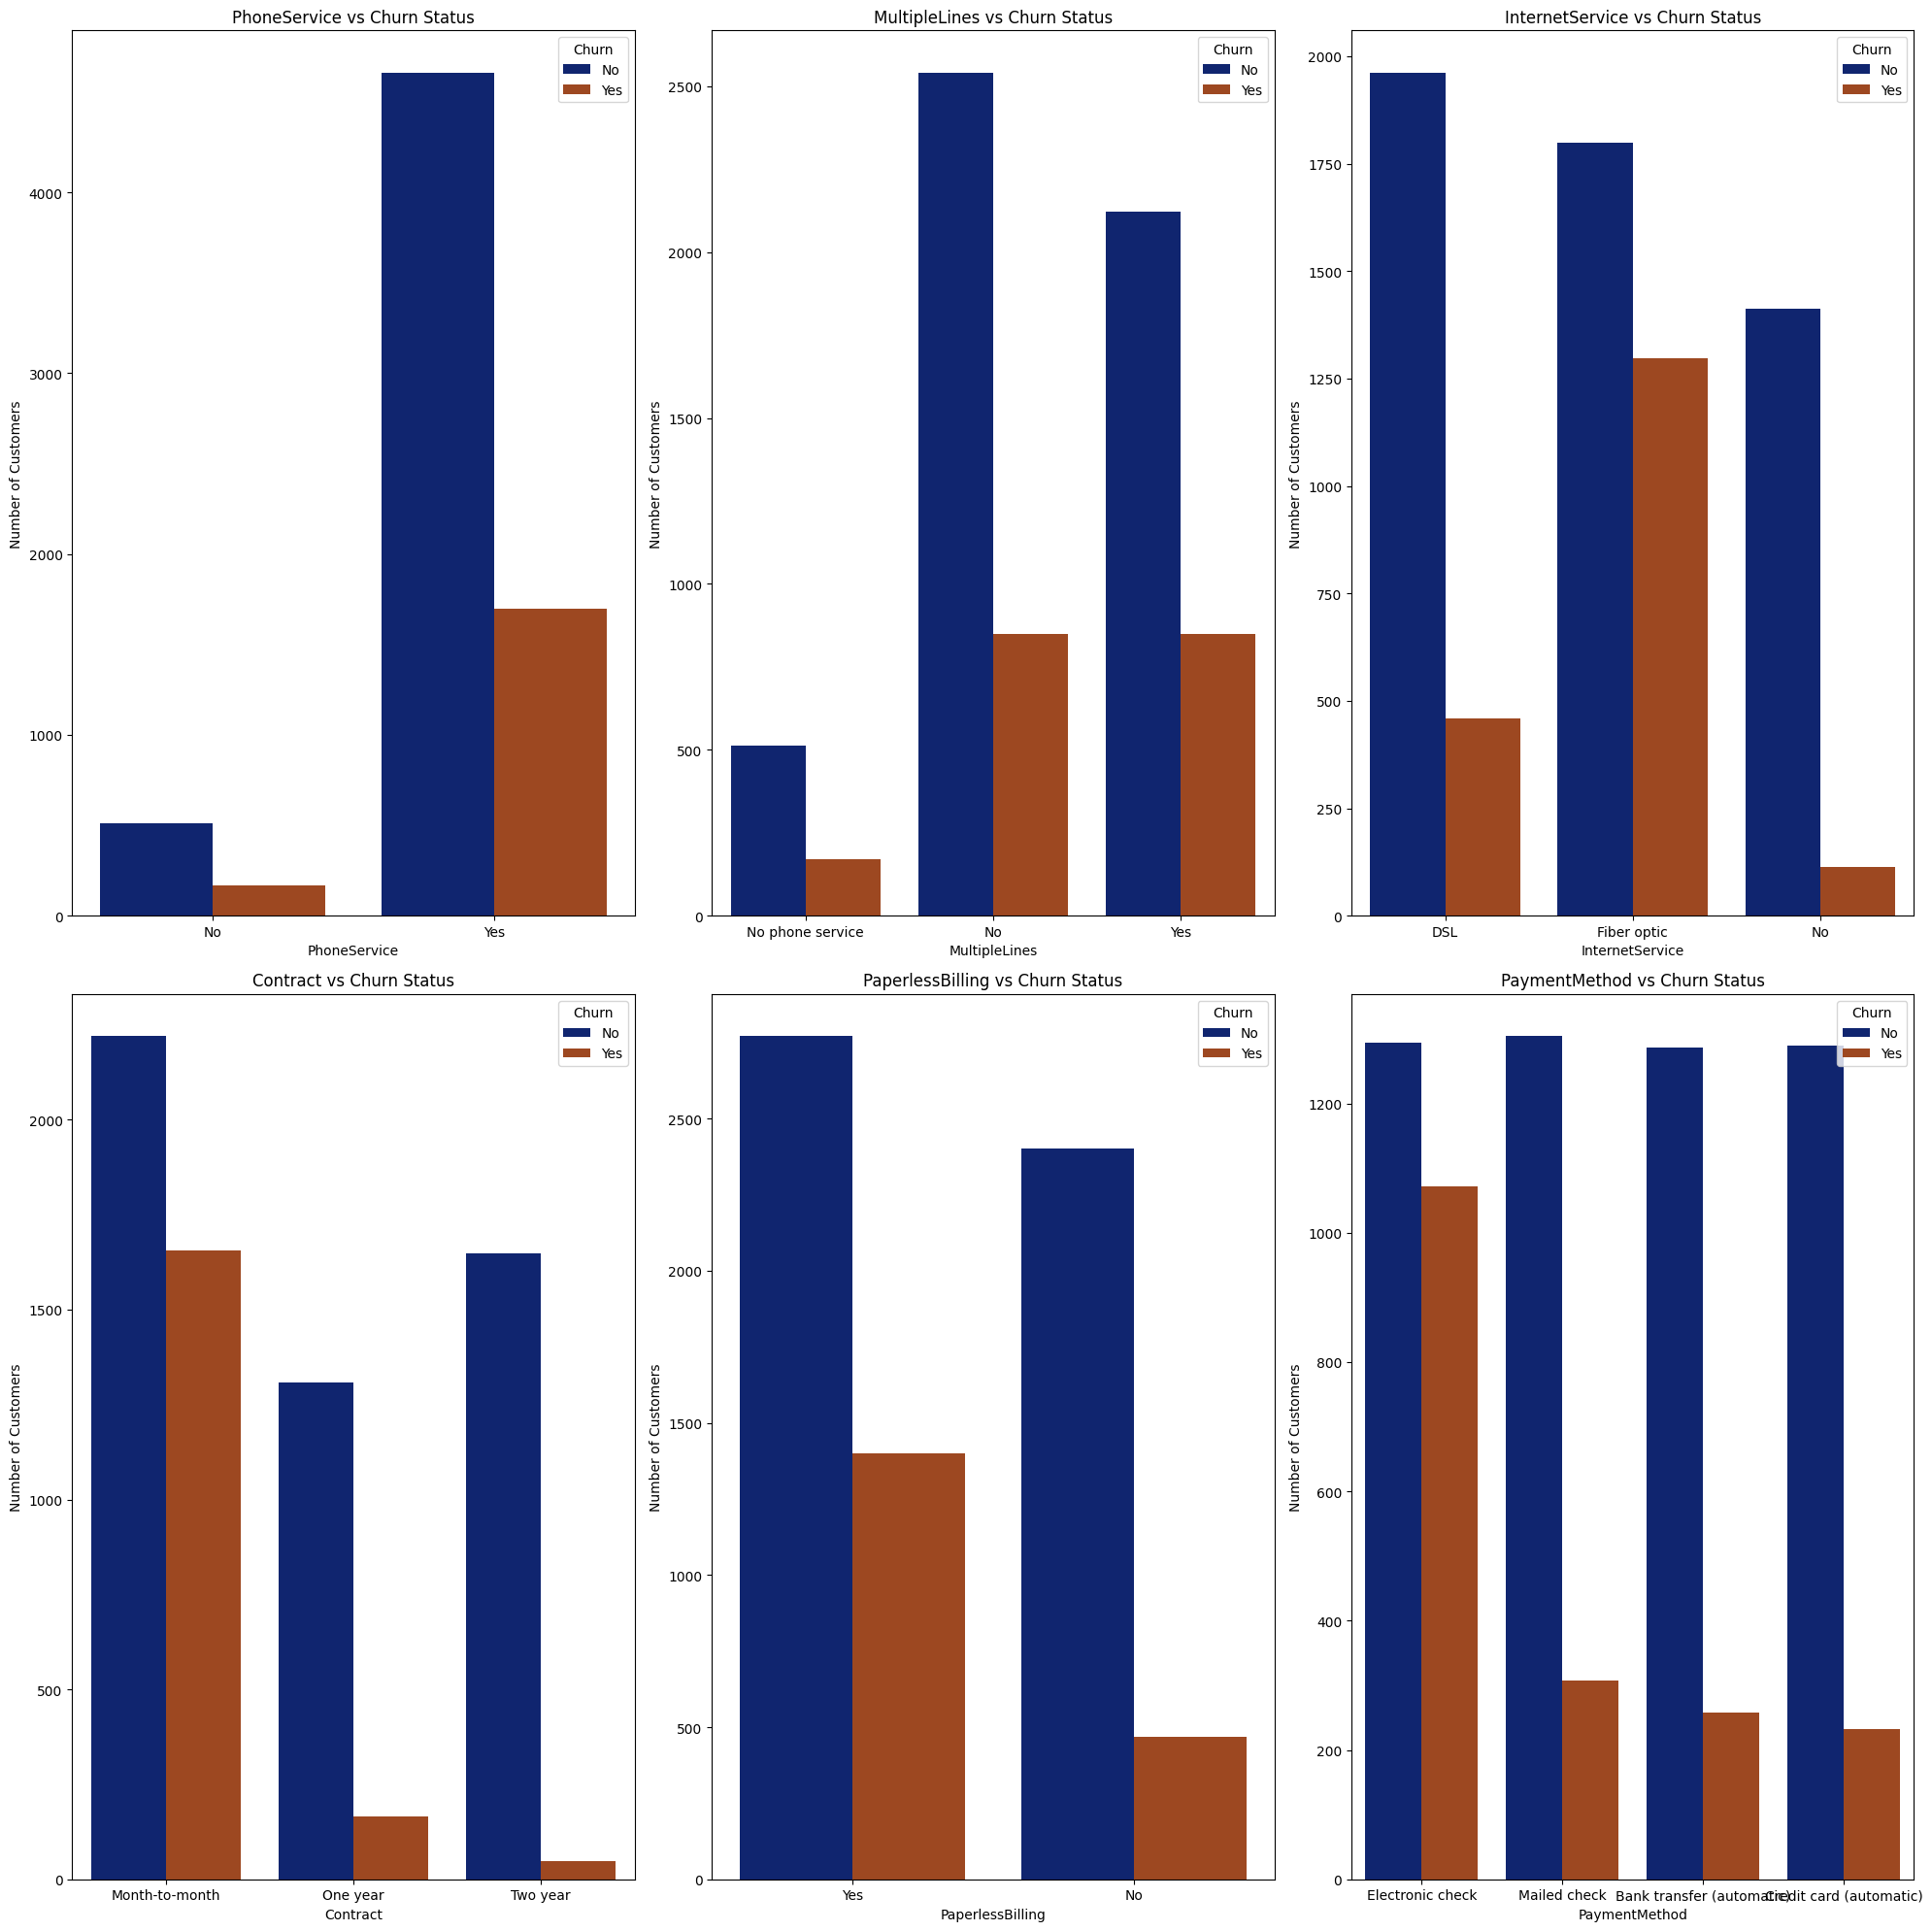

In [10]:
#more bar graphs lol
num_variables = ['PhoneService','MultipleLines','InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']
plt.figure(figsize=(20, 20))
for i, var in enumerate(num_variables):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=var, hue='Churn', data=dataFrame, palette='dark');
    plt.title(f'{var} vs Churn Status');
    plt.ylabel('Number of Customers');
    plt.xlabel(f'{var}');
    plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [11]:
#encoding the data to make it more accesible
label_encoder = LabelEncoder()

# Encode each column
columns_to_encode = [
    'gender', 
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling' , 
    'Churn',
    'Contract', 
    'MultipleLines', 
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies',
    'PaymentMethod'
]

label_encoders = {}

for column in columns_to_encode:
    # Fit and transform the column
    le = LabelEncoder()
    dataFrame[column] = le.fit_transform(dataFrame[column])
    label_encoders[column] = le

In [12]:
#making correlation between the features
columns_of_interest = dataFrame.columns[1:21]

corr_matrix = dataFrame[columns_of_interest].corr()

heatmap = go.Heatmap(z=corr_matrix.values,
                     x=corr_matrix.columns,
                     y=corr_matrix.columns)

layout = go.Layout(
    title='Correlation Matrix (Columns 1 to 20)',
    width=800,  # Specify the width of the figure
    height=600  # Specify the height of the figure
)

fig = go.Figure(data=[heatmap], layout=layout)

py.iplot(fig)